<a href="https://colab.research.google.com/github/veadesh234/DC_Task-2/blob/main/data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [4]:
df = pd.read_csv("/content/data.csv")
pd.options.display.max_rows = 999
print(df.to_string)

<bound method DataFrame.to_string of      S.No    EmpID Emp Name          DOJ                 Designation Grade  \
0       1  XYZ2685     ABC1    22-Nov-10             Sales Executive    E1   
1       2  XYZ2490     ABC2     5-Jul-10  Technical Services Officer    M2   
2       3  XYZ2662     ABC3    20-Oct-10             Sales Executive    E1   
3       4  XYZ1679     ABC4     1 May 08                  AM - Sales    M1   
4       5  XYZ2378     ABC5     3 Mar 10            Sales Executive     E1   
5       6  XYZ3009     ABC6    17 Nov 11             Sales Executive    E1   
6       7  XYZ2783     ABC7     7 Feb 11            Sales Executive     E1   
7       8  XYZ2657     ABC8    20 Oct 10             Sales Executive    E1   
8       9  XYZ3046     ABC9     1 Feb 12             Sales Executive    E1   
9      10  XYZ2845    ABC10    11-Apr-11             Sales Executive    E1   
10     11  XYZ2194    ABC11    12-Apr-11             Sales Executive    E1   
11     12  XYZ2255    ABC12

In [5]:
new_df = df.dropna()
print(df.columns.tolist())
new_df['DOJ'] = pd.to_datetime(df['DOJ'])
new_df['In Active Date'] = pd.to_datetime(df['In Active Date'])
print(new_df.to_string())

['S.No', 'EmpID', 'Emp Name', 'DOJ', 'Designation', 'Grade', 'Attrition ', 'Location', 'In Active Date', 'Tenure', 'Gender', 'Education', 'Age', 'Last Rating', 'Monthly Income', 'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone', 'Remarks']
     S.No    EmpID Emp Name        DOJ                 Designation Grade Attrition                Location In Active Date  Tenure  Gender  Education  Age  Last Rating  Monthly Income Engagement Score (% Satisfaction) Marital Status     Zone                                         Remarks
0       1  XYZ2685     ABC1 2010-11-22             Sales Executive    E1        Yes              Bhavnagar     2012-05-26   1. 6   Female  Bachelors   27            4           25535                                2%       Divorced     West                         Issues with the Manager
1       2  XYZ2490     ABC2 2010-07-05  Technical Services Officer    M2        Yes              Jayanagar     2012-04-06   1. 9     Male        MBA   36            2    

<ipython-input-5-faa68f7d2ffa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DOJ'] = pd.to_datetime(df['DOJ'])
<ipython-input-5-faa68f7d2ffa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['In Active Date'] = pd.to_datetime(df['In Active Date'])


<ipython-input-6-a096181a44b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = pd.DatetimeIndex(new_df['In Active Date']).year
<ipython-input-6-a096181a44b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = pd.DatetimeIndex(new_df['In Active Date']).month


Text(0.5, 1.0, 'Attrition rate by year')

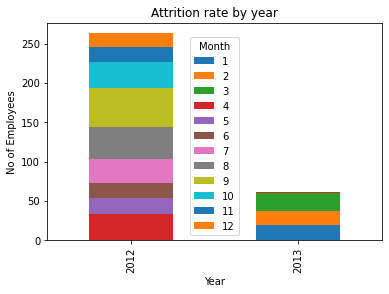

In [6]:
new_df['Year'] = pd.DatetimeIndex(new_df['In Active Date']).year
new_df['Month'] = pd.DatetimeIndex(new_df['In Active Date']).month

new_df.groupby(['Year','Month']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel("No of Employees")
plt.title("Attrition rate by year")

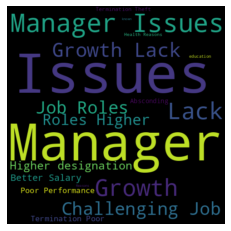

In [7]:
remarks =new_df['Remarks'].tolist()
text = ""

for word in remarks :
  text = text + " " + word
wordcloud = WordCloud(width=480, height=480).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<AxesSubplot:title={'center':'Monthly income distribution'}, xlabel='Monthly income', ylabel='Frequency'>

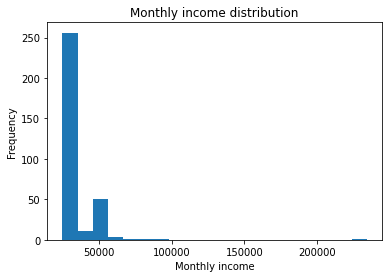

In [8]:
plt.title("Monthly income distribution")
plt.xlabel("Monthly income")
new_df['Monthly Income'].plot(kind='hist',bins=20)

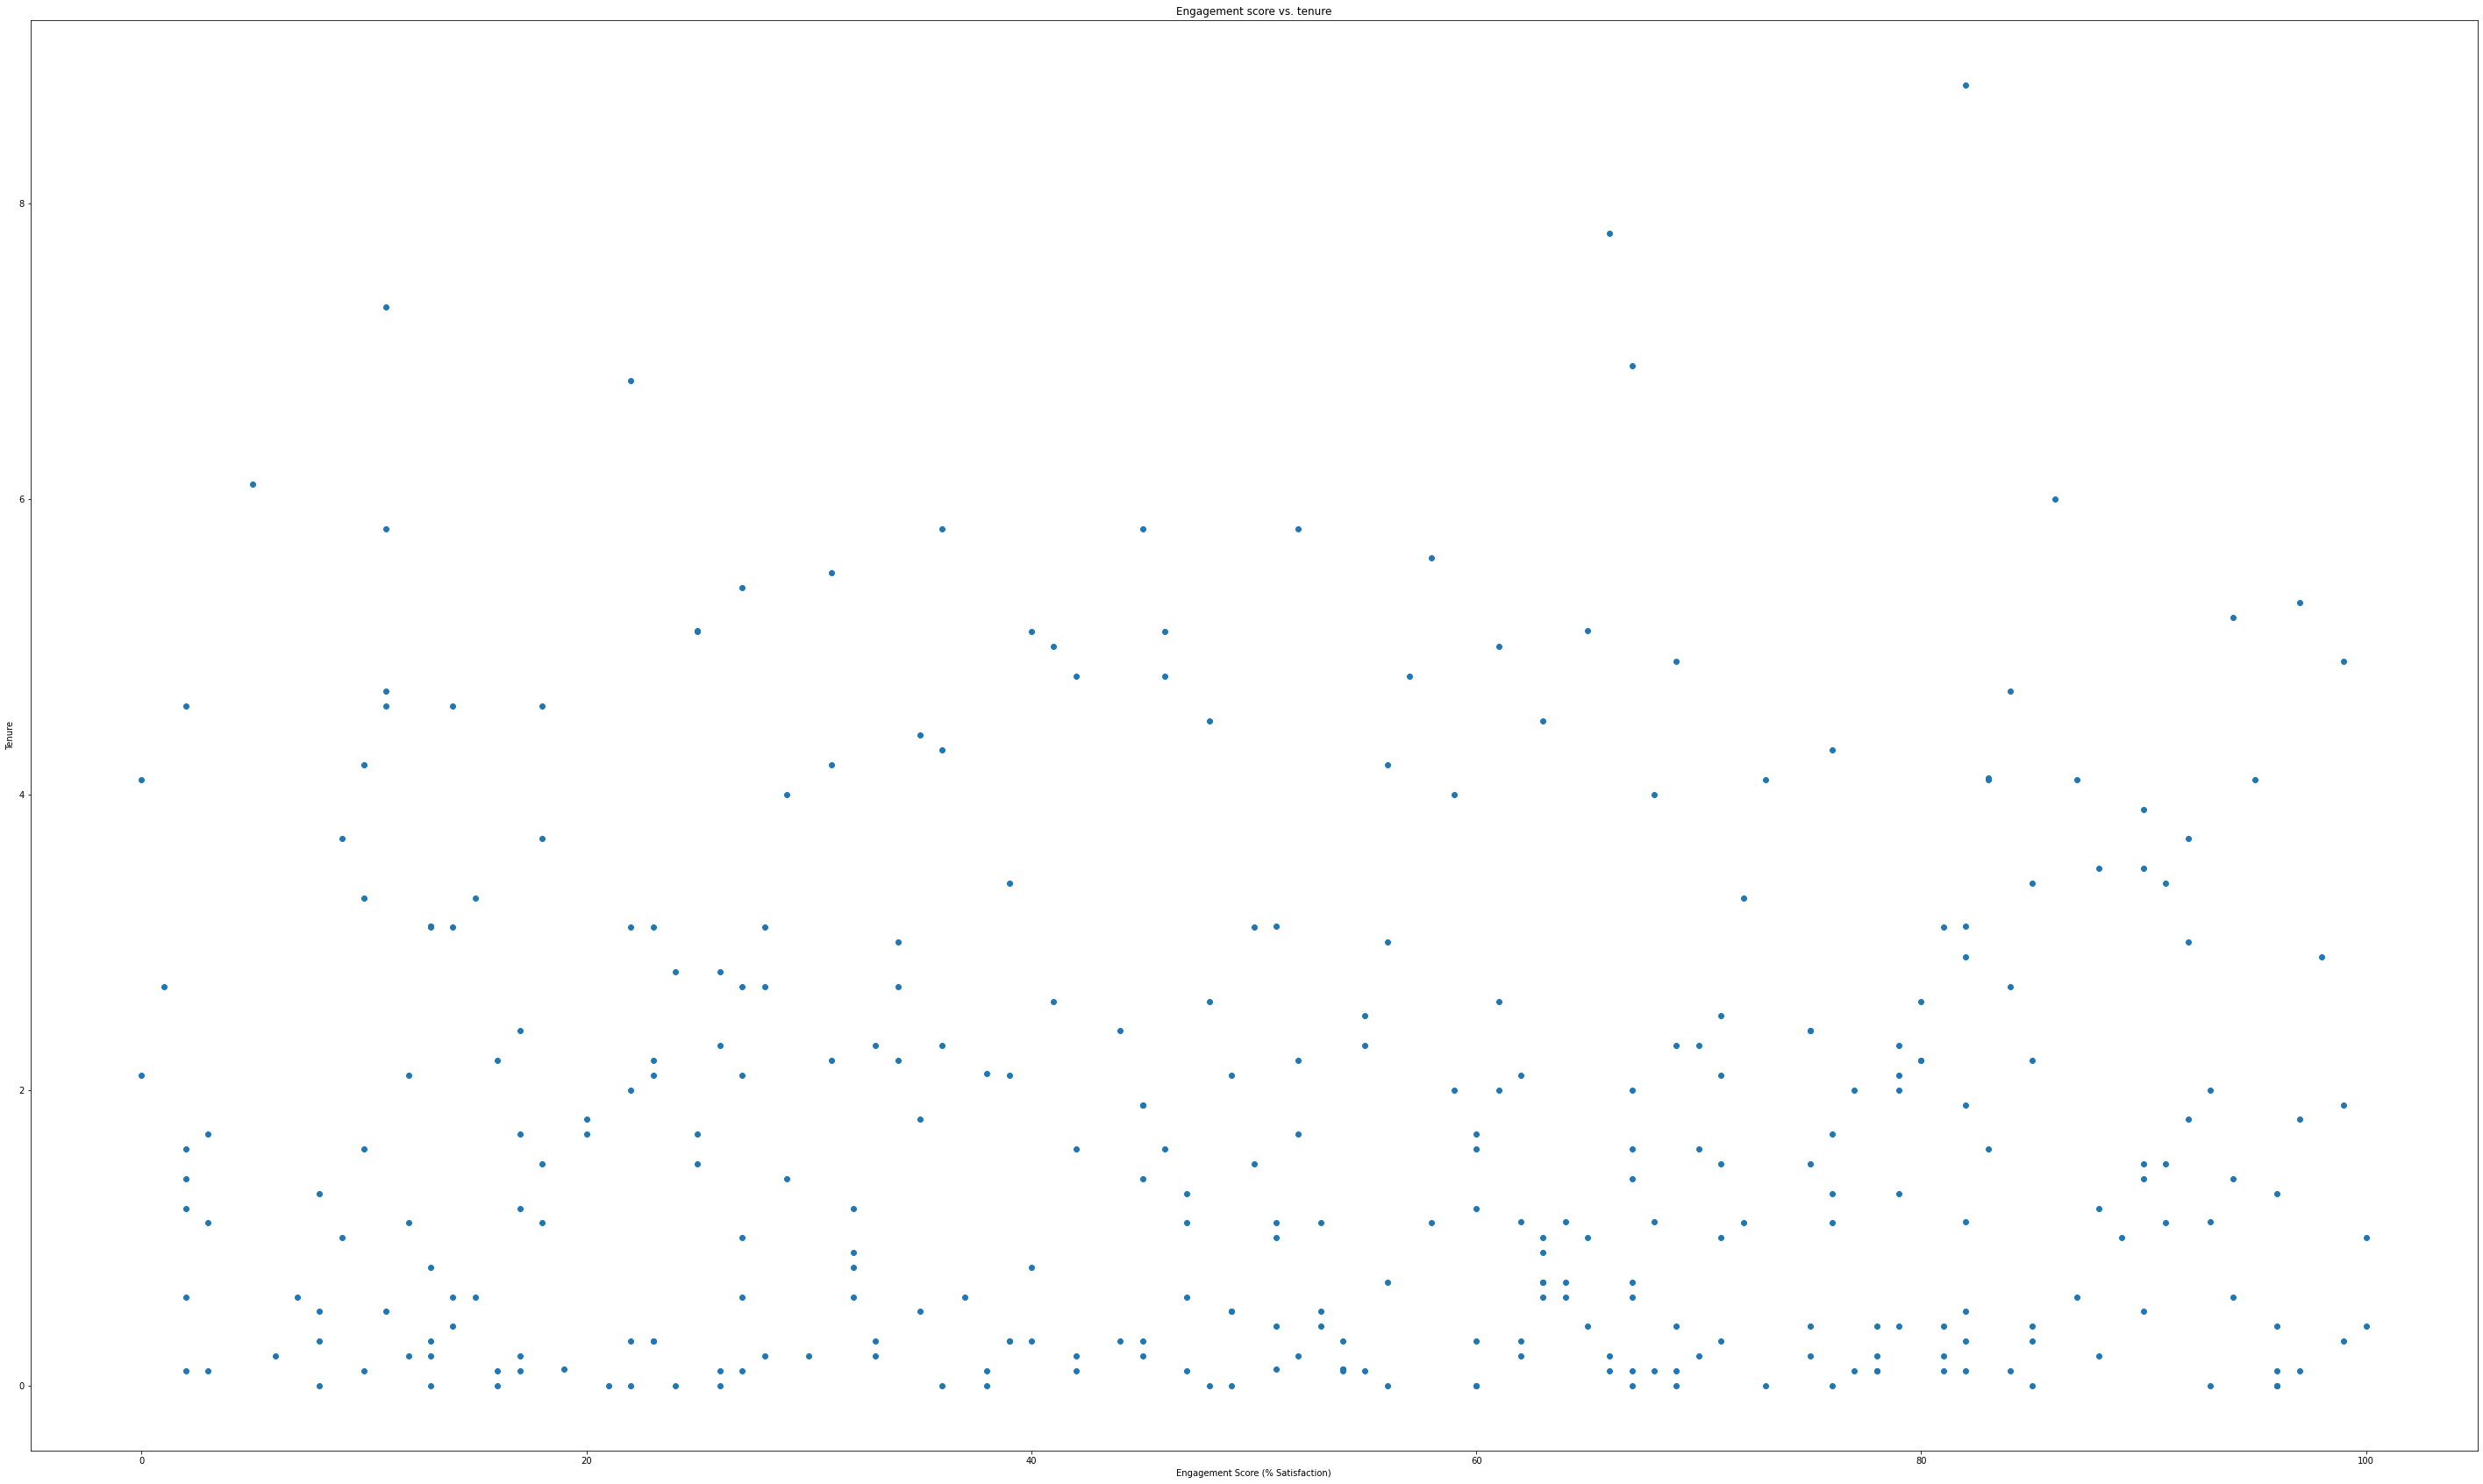

In [9]:
#tenure=df['Tenure'].tolist()
#print(tenure.sort())
#df.plot(kind='scatter',x='Engagement Score (% Satisfaction)',y='Tenure',color='red')
engscr=new_df['Engagement Score (% Satisfaction)'].tolist()
converted_values = []
for value in engscr:
    number = float(value.strip('%'))
    converted_values.append(number)
tenure=new_df['Tenure'].tolist()
conv_tenure=[]
for value in tenure:
    number = float(value.replace(' ', ''))
    conv_tenure.append(number)
plt.figure(figsize=(50, 30))
plt.title('Engagement score vs. tenure')
plt.xlabel("Engagement Score (% Satisfaction)")
plt.ylabel("Tenure")
plt.scatter(converted_values,conv_tenure)
#sns.scatterplot(x="Engagement Score (% Satisfaction)", y="Tenure",data=df)

Text(0, 0.5, 'No of Employees')

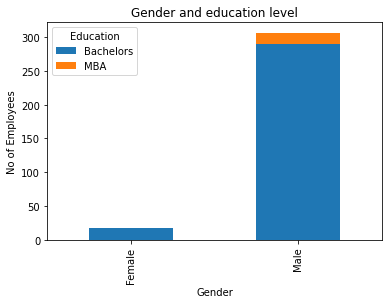

In [10]:
new_df.groupby(['Gender','Education']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Gender and education level')
plt.ylabel("No of Employees")

<AxesSubplot:title={'center':'Last rating distribution'}, xlabel='Last rating', ylabel='Frequency'>

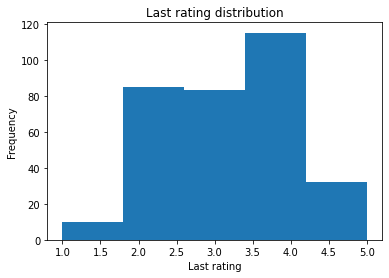

In [11]:
plt.title('Last rating distribution')
plt.xlabel("Last rating")
new_df['Last Rating'].plot(kind='hist',bins=5)

<AxesSubplot:title={'center':'Monthly income by location'}, ylabel='Location'>

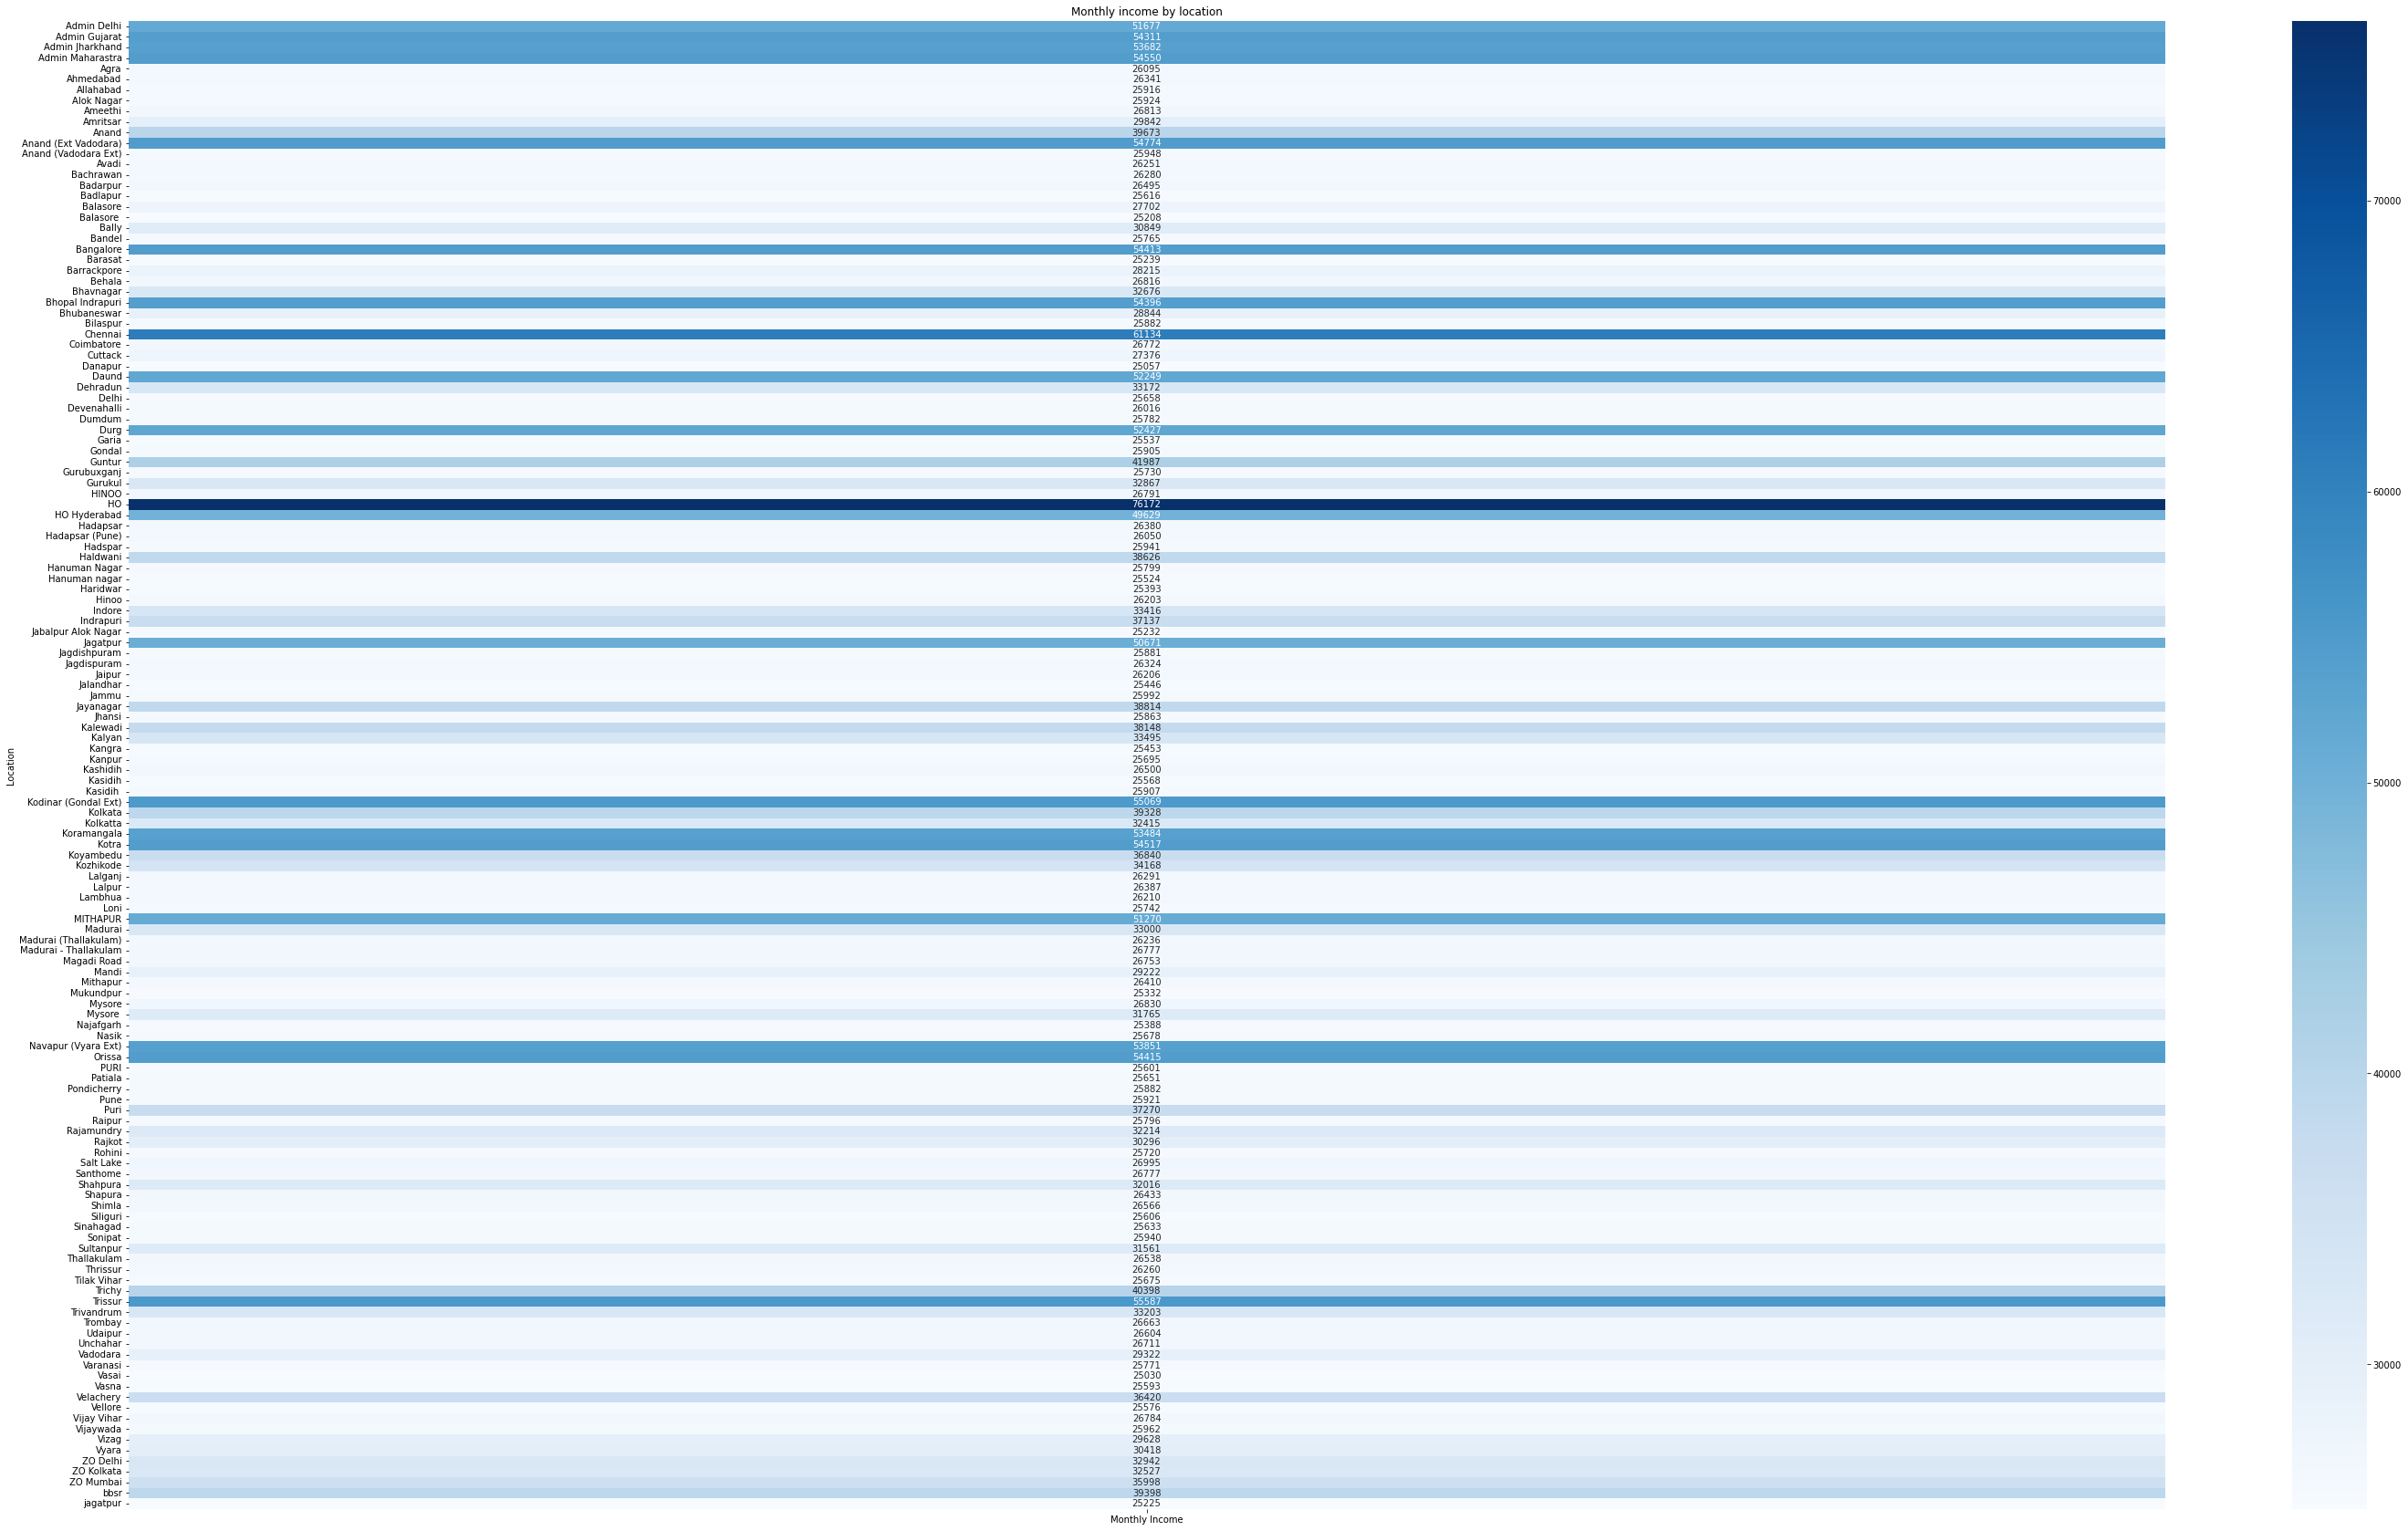

In [19]:
plt.figure(figsize=(50, 30))
plt.title("Monthly income by location")
pivot_table = pd.pivot_table(new_df, values='Monthly Income', index='Location', aggfunc='mean')
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')